In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('nba2013.csv')
data.head()

,Name,Position,Height,Weight,Age
0,DeQuan Jones,Guard,80,221,23
1,Darius Miller,Guard,80,235,23
2,Trevor Ariza,Guard,80,210,28
3,James Jones,Guard,80,215,32
4,Wesley Johnson,Guard,79,215,26


In [4]:
data['Position'].value_counts()

Forward    211
Guard      202
Center      92
Name: Position, dtype: int64

In [5]:
position_map = {'Forward':0,'Guard':1,'Center':2}

In [6]:
data['Position'] = data['Position'].map(position_map)

In [7]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(data[['Position','Height','Weight','Age']])

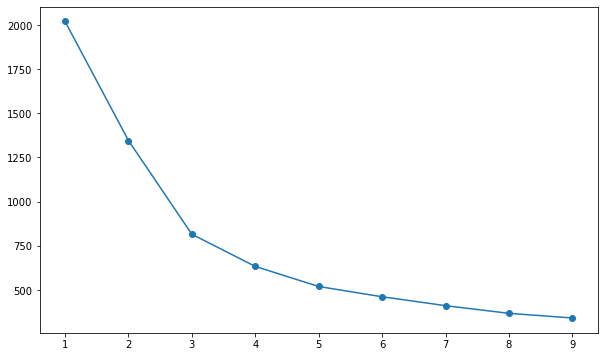

In [8]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_df)
    cluster_errors.append(clusters.inertia_)
plt.figure(figsize=(10,6))
plt.plot(cluster_range, cluster_errors,marker = "o")

## Number of clusters - 3

In [9]:
k = 3
clusters = KMeans(k,random_state = 42)
clusters.fit(scaled_df)
data['cluster_id'] = clusters.labels_

In [10]:
data

,Name,Position,Height,Weight,Age,cluster_id
0,DeQuan Jones,1,80,221,23,2
1,Darius Miller,1,80,235,23,2
2,Trevor Ariza,1,80,210,28,1
3,James Jones,1,80,215,32,2
4,Wesley Johnson,1,79,215,26,1
...,...,...,...,...,...,...
500,Joel Anthony,2,81,245,31,0
501,Bismack Biyombo,2,81,229,21,0
502,Luis Scola,2,81,245,33,0
503,Lavoy Allen,2,81,225,24,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        505 non-null    object
 1   Position    505 non-null    int64 
 2   Height      505 non-null    int64 
 3   Weight      505 non-null    int64 
 4   Age         505 non-null    int64 
 5   cluster_id  505 non-null    int32 
dtypes: int32(1), int64(4), object(1)
memory usage: 21.8+ KB


In [12]:
position_map_reverse = {0:'Forward',1:'Guard',2:'Center'}
data['Position'] = data['Position'].map(position_map_reverse)

In [13]:
data[data['cluster_id']==0]

,Name,Position,Height,Weight,Age,cluster_id
413,Hasheem Thabeet,Center,87,263,26,0
414,Roy Hibbert,Center,86,278,26,0
415,Alex Len,Center,85,255,20,0
416,Rudy Gobert,Center,85,235,21,0
417,Meyers Leonard,Center,85,250,21,0
...,...,...,...,...,...,...
500,Joel Anthony,Center,81,245,31,0
501,Bismack Biyombo,Center,81,229,21,0
502,Luis Scola,Center,81,245,33,0
503,Lavoy Allen,Center,81,225,24,0


In [14]:
data[data['cluster_id']==1]

,Name,Position,Height,Weight,Age,cluster_id
2,Trevor Ariza,Guard,80,210,28,1
4,Wesley Johnson,Guard,79,215,26,1
5,Klay Thompson,Guard,79,205,23,1
6,Thabo Sefolosha,Guard,79,215,29,1
7,Chase Budinger,Guard,79,218,25,1
...,...,...,...,...,...,...
198,Shane Larkin,Guard,71,176,20,1
199,Phil Pressey,Guard,71,175,22,1
200,Isaiah Thomas,Guard,69,185,24,1
201,Nate Robinson,Guard,69,180,29,1


In [15]:
data[data['cluster_id']==2]

,Name,Position,Height,Weight,Age,cluster_id
0,DeQuan Jones,Guard,80,221,23,2
1,Darius Miller,Guard,80,235,23,2
3,James Jones,Guard,80,215,32,2
10,Ronnie Brewer,Guard,79,235,28,2
17,Joe Johnson,Guard,79,240,32,2
...,...,...,...,...,...,...
407,Alonzo Gee,Forward,78,219,26,2
408,Mickael Pietrus,Forward,78,215,31,2
409,Jerry Stackhouse,Forward,78,218,38,2
410,Alan Anderson,Forward,78,219,30,2
